In [2]:
import matplotlib.pyplot as pyplot
import numpy as np

In [9]:
x = np.arange(15, 25.5, step=1)

In [10]:
x = np.array(list(x[:-1]) + [24.25, 24.5, 24.75, 25.0])

In [11]:
x, len(x)

(array([15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 21.  , 22.  , 23.  ,
        24.  , 24.25, 24.5 , 24.75, 25.  ]), 14)

In [12]:
y = np.linspace(0, 100, num=len(x))
y[np.where(x==15)[0][0]] = 0
y[np.where(x==16)[0][0]] = 1
y[np.where(x==17)[0][0]] = 2
y[np.where(x==18)[0][0]] = 3
y[np.where(x==19)[0][0]] = 4
y[np.where(x==20)[0][0]] = 5
y[np.where(x==21)[0][0]] = 10
y[np.where(x==22)[0][0]] = 20
y[np.where(x==23)[0][0]] = 45
y[np.where(x==24)[0][0]] = 70
y[np.where(x==24.25)[0][0]] = 90
y[np.where(x==24.5)[0][0]] = 93
y[np.where(x==24.75)[0][0]] = 95
y[np.where(x==25)[0][0]] = 100

In [13]:
y, len(y)

(array([  0.,   1.,   2.,   3.,   4.,   5.,  10.,  20.,  45.,  70.,  90.,
         93.,  95., 100.]), 14)

In [14]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

[15.] [1.0000000e+00 1.5000000e+01 2.2500000e+02 3.3750000e+03 5.0625000e+04
 7.5937500e+05 1.1390625e+07]
2.4202151709552826
0.9963681906132967


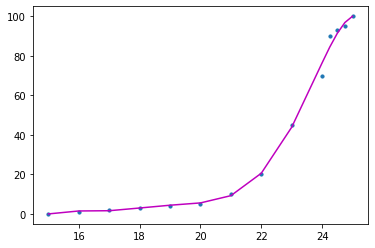

In [24]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=6)
x_poly = polynomial_features.fit_transform(x)
print(x[0], x_poly[0])
model = LinearRegression(fit_intercept=False)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [25]:
model.coef_

array([[-1.73847074e+05,  5.58755958e+04, -7.44025533e+03,
         5.25236313e+02, -2.07256443e+01,  4.33270309e-01,
        -3.74702555e-03]])

In [26]:
model.intercept_

0.0

In [27]:
def f(a):
    result = model.coef_[0,0]*np.power(a, 0)
    s1 = "%f "%(model.coef_[0,0])
    s2 = "%f "%(model.coef_[0,0])
    for i in range(1, len(model.coef_[0])):
        result += model.coef_[0,i]*np.power(a, i)
        if model.coef_[0,i] > 0:
            s1 += "+"
            s2 += "+"
        
        s1 += "%f * x^%d "%(model.coef_[0,i], i)
        s2 += "%f * pow(x, %d) "%(model.coef_[0,i], i)
    print("%s"%(s1))
    print("//#define REACTION(x) (%s)"%(s2))
    return result

In [28]:
t = np.arange(0, 35, step=1)

-173847.074088 +55875.595836 * x^1 -7440.255326 * x^2 +525.236313 * x^3 -20.725644 * x^4 +0.433270 * x^5 -0.003747 * x^6 
//#define REACTION(x) (-173847.074088 +55875.595836 * pow(x, 1) -7440.255326 * pow(x, 2) +525.236313 * pow(x, 3) -20.725644 * pow(x, 4) +0.433270 * pow(x, 5) -0.003747 * pow(x, 6) )


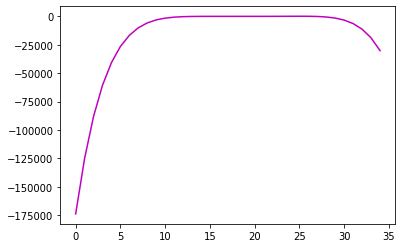

In [29]:
plt.plot(t, f(t), color='m')